In [549]:
import pandas as pd
import ta
import yfinance as yf

asset = "INTC"

In [550]:
def add_features(prices):
    indicators = ta.add_all_ta_features(prices, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
    indicators['ema2'] = indicators['Close'].ewm(span=2, adjust=False).mean()
    indicators['ema3'] = indicators['Close'].ewm(span=3, adjust=False).mean()
    indicators['ema4'] = indicators['Close'].ewm(span=4, adjust=False).mean()
    indicators['ema5'] = indicators['Close'].ewm(span=5, adjust=False).mean()
    indicators['ema6'] = indicators['Close'].ewm(span=6, adjust=False).mean()
    indicators['ema7'] = indicators['Close'].ewm(span=7, adjust=False).mean()
    indicators['ema10'] = indicators['Close'].ewm(span=10, adjust=False).mean()
    indicators['ema20'] = indicators['Close'].ewm(span=20, adjust=False).mean()
    return indicators.copy()


In [551]:
import yfinance as yf

start_date = "2022-03-01"
end_date = "2025-03-01"

indicators = yf.Ticker(asset).history(start=start_date, end=end_date, actions=False)
indicators = add_features(indicators)

target = indicators['Close'].iloc[:-1] - indicators['Close'].shift(-1).iloc[:-1]
indicators = indicators.iloc[:-1]

c:\Users\JW\AppData\Local\pypoetry\Cache\virtualenvs\cryptoto-IqJLIiLB-py3.12\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [552]:
df = indicators
df

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,others_dlr,others_cr,ema2,ema3,ema4,ema5,ema6,ema7,ema10,ema20
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01 00:00:00-05:00,44.427628,44.764060,43.194047,43.754765,53853000,-1.538668e+07,53853000,-0.285716,0.000000e+00,0.000000,...,0.000000,0.000000,43.754765,43.754765,43.754765,43.754765,43.754765,43.754765,43.754765,43.754765
2022-03-02 00:00:00-05:00,44.408939,45.782701,44.371557,45.670555,46936500,2.408956e+07,100789500,0.239009,8.992050e+07,3.301361,...,4.285327,4.378473,45.031958,44.712660,44.521081,44.393361,44.302133,44.233712,44.103090,43.937221
2022-03-03 00:00:00-05:00,45.025732,45.371508,44.502393,44.792099,36389900,1.195969e+07,64399600,0.087183,7.250801e+07,-0.334795,...,-1.942202,2.370792,44.872052,44.752379,44.629488,44.526274,44.442123,44.373309,44.228364,44.018638
2022-03-04 00:00:00-05:00,44.268751,45.109831,44.268751,44.922924,38310700,3.324338e+07,102710300,0.189432,6.286573e+07,-0.543715,...,0.291646,2.669788,44.905967,44.837652,44.746862,44.658491,44.579495,44.510713,44.354648,44.104760
2022-03-07 00:00:00-05:00,44.866861,45.362166,44.483704,44.558468,43813700,-3.112521e+06,58896600,-0.014193,5.160374e+07,0.468454,...,-0.814601,1.836836,44.674301,44.698060,44.671505,44.625150,44.573487,44.522651,44.391706,44.147971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21 00:00:00-05:00,25.959999,26.290001,24.840000,24.870001,111630900,-2.518235e+08,906661200,0.075386,9.864296e+07,0.344215,...,-4.788981,-43.160474,25.249634,25.332713,25.235746,25.044894,24.813804,24.572312,23.903159,22.560771
2025-02-24 00:00:00-05:00,24.549999,24.799999,23.620001,24.270000,91358100,-2.425328e+08,815303100,0.099197,7.672041e+07,-1.750144,...,-2.442125,-44.531754,24.596545,24.801357,24.849448,24.786596,24.658432,24.496734,23.969858,22.723555
2025-02-25 00:00:00-05:00,24.209999,24.280001,22.770000,22.990000,88886500,-3.055187e+08,726416600,0.096235,4.950681e+07,-1.163674,...,-5.418171,-47.457151,23.525515,23.895678,24.105669,24.187731,24.181737,24.120051,23.791702,22.748930


In [553]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df


array([[ 1.57796087,  1.5477675 ,  1.49719749, ...,  1.49641901,
         1.49777681,  1.50259996],
       [ 1.57555748,  1.6777462 ,  1.65005291, ...,  1.55857331,
         1.54318105,  1.52676179],
       [ 1.65487471,  1.62527783,  1.66703706, ...,  1.57668914,
         1.55951056,  1.53754346],
       ...,
       [-1.02194961, -1.0660002 , -1.15409784, ..., -1.05162965,
        -1.10440864, -1.27910446],
       [-1.14540185, -1.12469636, -1.09698055, ..., -1.07109718,
        -1.11084796, -1.26937977],
       [-1.08753346, -1.05068832, -1.11515421, ..., -1.09964839,
        -1.1263075 , -1.26600438]])

In [554]:
import torch
close_index = indicators.columns.get_loc('Close')

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset."""
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i+lookback]
        target = (dataset[i+1:i+lookback+1, close_index:close_index+1] - 
                  dataset[i:i+lookback, close_index:close_index+1]) > 0
        X.append(feature.astype('float32'))
        y.append(target.astype('int64').squeeze(-1))
    return torch.tensor(X), torch.tensor(y)

 
train_size = int(len(df) * 0.85)
train, test = df[:train_size], df[train_size:]
test_size = len(test)

lookback = 30
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([609, 30, 99]) torch.Size([609, 30])
torch.Size([83, 30, 99]) torch.Size([83, 30])


In [555]:
import torch.nn as nn
 
class Model(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=50, num_layers=1, batch_first=True, dropout=0.2)
        self.linear = nn.Linear(50, 2)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [556]:

import numpy as np
import torch.optim as optim
import torch.utils.data as data
 
model = Model(X_train.shape[2])
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=32)
 
n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred.view(-1, 2), y_batch.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    if epoch % 50 != 0:
        continue
    
    model.eval()
    
    with torch.no_grad():
        y_pred_train = model(X_train)
        train_loss = loss_fn(y_pred_train.view(-1, 2), y_train.view(-1))
        
        y_pred_test = model(X_test)
        test_loss = loss_fn(y_pred_test.view(-1, 2), y_test.view(-1))
        
    print("Epoch %d: train loss %.4f, test loss %.4f" % (epoch, train_loss, test_loss))

Epoch 0: train loss 0.6642, test loss 0.6928


c:\Users\JW\AppData\Local\pypoetry\Cache\virtualenvs\cryptoto-IqJLIiLB-py3.12\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 50: train loss 0.0262, test loss 1.7962
Epoch 100: train loss 0.0114, test loss 1.9780
Epoch 150: train loss 0.0067, test loss 2.0152
Epoch 200: train loss 0.0043, test loss 2.1547
Epoch 250: train loss 0.0027, test loss 2.2333
Epoch 300: train loss 0.0017, test loss 2.2632
Epoch 350: train loss 0.0011, test loss 2.0039
Epoch 400: train loss 0.0007, test loss 2.2058
Epoch 450: train loss 0.0005, test loss 2.3567


In [557]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(y_train[:,-1,:])
    plt.plot(model(X_train)[:,-1,:])
    plt.show()


IndexError: too many indices for tensor of dimension 2

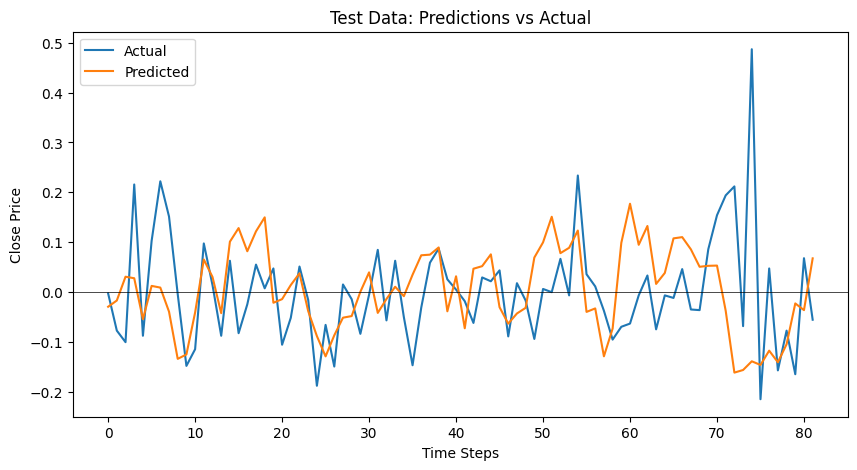

In [470]:
import matplotlib.pyplot as plt

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_last = y_pred[:, -1, :].numpy()
    y_test_last = y_test[:, -1, :].numpy()

plt.figure(figsize=(10, 5))
plt.plot(y_test_last[1:], label='Actual')
plt.plot(y_pred_last[1:], label='Predicted')
# zero line
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Test Data: Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf

start_date = "2025-01-01"
end_date = "2025-04-01"

test_indicators = yf.Ticker(asset).history(start=start_date, end=end_date, actions=False)
test_indicators = add_features(test_indicators)

test_target = test_indicators['Close'].iloc[:-1] - test_indicators['Close'].shift(-1).iloc[:-1]
test_indicators = test_indicators.iloc[:-1]

len(test_indicators)

c:\Users\JW\AppData\Local\pypoetry\Cache\virtualenvs\cryptoto-IqJLIiLB-py3.12\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


59

In [472]:
test_indicators_scaled = scaler.transform(test_indicators)
X_test, y_test = create_dataset(test_indicators_scaled, lookback=lookback)

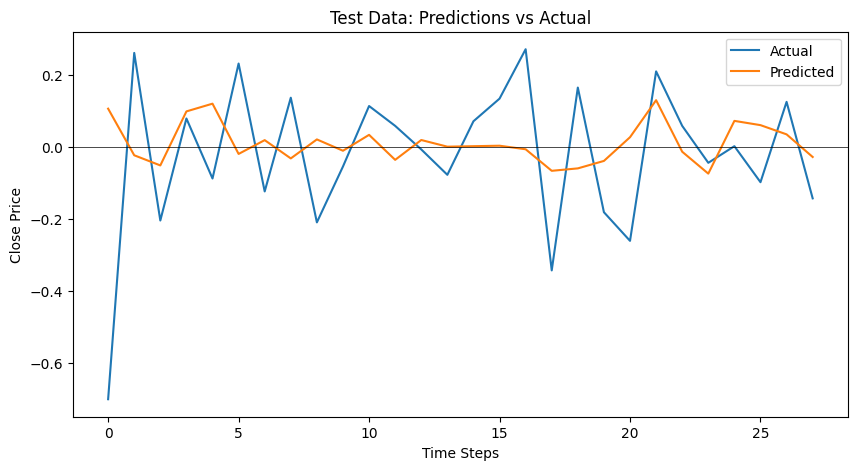

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_last = y_pred[:, -1, :].numpy()
    y_test_last = y_test[:, -1, :].numpy()

plt.figure(figsize=(10, 5))
plt.plot(y_test_last[1:] - y_test_last[:-1], label='Actual')
plt.plot(y_pred_last[1:] - y_pred_last[:-1], label='Predicted')
# zero line
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Test Data: Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()
